In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

### "Uretim_Van_TShirt-Elbise_240820.v4" Dosyasının Okunması

In [177]:
# Veri kümesini oku
df = pd.read_csv('Uretim_Van_TShirt-Elbise_240820.v4.csv', sep=';')
# Belirli kolonları seçmek için
selected_columns = ['UretimID','ModelAdi','PersonelNo','ModelID','ModelTipAdi',
                    'OperAdi','MakinaTipi','Uretim','Etut','BirimUretimZamani'] 
print(len(df))

17763


In [178]:
df[selected_columns].head()

,UretimID,ModelAdi,PersonelNo,ModelID,ModelTipAdi,OperAdi,MakinaTipi,Uretim,Etut,BirimUretimZamani
0,101779,TOLS24GTMAC BTW38 DANTELLI TSHIRT,21,300,T-SHIRT,BIYE UCU TUTTURMA,DÜZ,1474,20,21.18
1,101780,TOLS24GTMAC BTW38 DANTELLI TSHIRT,24,300,T-SHIRT,OMUZ ÇATMA,OVERLOK,952,27,34.01
2,101782,TOLS24GTMAC BTW38 DANTELLI TSHIRT,435,300,T-SHIRT,KOL EMNIYET,DÜZ,1702,17,18.66
3,101789,TOLS24GTMAC BTW38 DANTELLI TSHIRT,379,300,T-SHIRT,BEDEN ÜTÜ,ÜTÜ,531,40,59.02
4,101791,TOLS24GTMAC BTW38 DANTELLI TSHIRT,51,300,T-SHIRT,KOL TAKMA,OVERLOK,170,40,50.28


In [179]:
#Personal Adi çıkarıldı 
# Uretim ID unique olduğu için çıkarıldı.
# Filtrelenecek kolon isimleri
#"['PersonelYetkinlik', KumasKarisimi, 'ModelTipiDetayi', 'KumasTipi'] not in index"

# Sadece seçilen kolonları içeren yeni DataFrame oluştur
# df = df[selected_columns]

### "Siparis_240820.v4" Dosyasının Okunması

In [180]:
# Veri kümesini oku
df_siparis = pd.read_csv('Siparis_240820.v4.csv', sep=';')
# Belirli kolonları seçmek için
selected_columns_2 = ['MES_ModelID','SIPARIS_ADEDI','GIYSI_GRUBU','GIYSI_CINSI','GIYSI_CINSI_DETAYI'] 
print(len(df_siparis))

35


In [181]:
df_siparis[selected_columns_2].head()

,MES_ModelID,SIPARIS_ADEDI,GIYSI_GRUBU,GIYSI_CINSI,GIYSI_CINSI_DETAYI
0,298,14292,ÇOCUK,T-Shirt,Kısa Kol
1,297,32073,BAYAN,T-Shirt,Uzun Kol
2,300,15870,BAYAN,T-Shirt,Kısa Kol
3,307,14170,ÇOCUK,Sweatshirt,Kapşonsuz
4,309,22113,ÇOCUK,Elbise,3/4 kol


### İki Dosyanın Birleştirilmesi

In [182]:
# DataFrame'leri MES_ModelID ve ModelID kolonları üzerinden birleştirme
merged_df = pd.merge(df_siparis[selected_columns_2], df[selected_columns], left_on='MES_ModelID', right_on='ModelID', how='inner')

# ModelID kolonunu DataFrame'den çıkarma
merged_df = merged_df.drop(columns=['ModelID','MES_ModelID'])

# Birleştirilmiş DataFrame'i gösterme
merged_df.head()

,SIPARIS_ADEDI,GIYSI_GRUBU,GIYSI_CINSI,GIYSI_CINSI_DETAYI,UretimID,ModelAdi,PersonelNo,ModelTipAdi,OperAdi,MakinaTipi,Uretim,Etut,BirimUretimZamani
0,14292,ÇOCUK,T-Shirt,Kısa Kol,101804,308626 TOMMIE TEE ÇIÇEKLI TSHIRT,2,T-SHIRT,ENSE GAZI,DÜZ,129,30,84.65
1,14292,ÇOCUK,T-Shirt,Kısa Kol,101805,308626 TOMMIE TEE ÇIÇEKLI TSHIRT,192,T-SHIRT,SON KALITE KONTROL,MANUEL,1432,15,16.88
2,14292,ÇOCUK,T-Shirt,Kısa Kol,101808,308626 TOMMIE TEE ÇIÇEKLI TSHIRT,421,T-SHIRT,YAN ÇATMA,OVERLOK,74,45,56.15
3,14292,ÇOCUK,T-Shirt,Kısa Kol,101814,308626 TOMMIE TEE ÇIÇEKLI TSHIRT,501,T-SHIRT,ÖN KALITE KONTROL,MANUEL,704,40,37.67
4,14292,ÇOCUK,T-Shirt,Kısa Kol,101820,308626 TOMMIE TEE ÇIÇEKLI TSHIRT,204,T-SHIRT,KIBRIT EMNIYET,DÜZ,409,20,23.48


In [183]:
len(merged_df)

17763

In [184]:
# PersonelNo ve UretimID kolonlarını string'e çevir
merged_df['PersonelNo'] = merged_df['PersonelNo'].astype(str)
merged_df['UretimID'] = merged_df['UretimID'].astype(str)

merged_df['Etut'] = merged_df['Etut'].str.replace(',', '.').astype(float)

merged_df = merged_df[(merged_df['Uretim'] > 0) & (merged_df['BirimUretimZamani'] > 0)]

In [185]:
# Her kolonda kaç tane NA (eksik) değer olduğunu hesapla
na_counts = merged_df.isna().sum()

# En az bir NA değeri olan satır sayısını hesapla
rows_with_na = merged_df.isna().any(axis=1).sum()

# Sonuçları yazdır
print("Kolonlardaki NA sayıları:")
print(na_counts)
print("\nNA değerleri nedeniyle çıkarılacak satır sayısı:", rows_with_na)
#df = df[df['BirimUretimZamani'] <= 200]
merged_df = merged_df.dropna()

merged_df = merged_df.sort_values(by='BirimUretimZamani',ascending=False)
merged_df.head()



Kolonlardaki NA sayıları:
SIPARIS_ADEDI         0
GIYSI_GRUBU           0
GIYSI_CINSI           0
GIYSI_CINSI_DETAYI    0
UretimID              0
ModelAdi              0
PersonelNo            0
ModelTipAdi           0
OperAdi               0
MakinaTipi            0
Uretim                0
Etut                  0
BirimUretimZamani     0
dtype: int64

NA değerleri nedeniyle çıkarılacak satır sayısı: 0


,SIPARIS_ADEDI,GIYSI_GRUBU,GIYSI_CINSI,GIYSI_CINSI_DETAYI,UretimID,ModelAdi,PersonelNo,ModelTipAdi,OperAdi,MakinaTipi,Uretim,Etut,BirimUretimZamani
6341,15910,BAYAN,Bluz,Uzun Kollu,114333,2220847 BEGONIA BLUZ,454,T-SHIRT,BEDEN ÜTÜ,ÜTÜ,1,30.0,32174.0
12944,46432,ÇOCUK,Elbise,Askılı elbise,135801,2218178 ASKILI BÜRÜMCÜK ELBISE,61,ELBISE,ÖN ARKA TULUM,REÇME,1,27.0,31201.0
15549,4402,BAYAN,Elbise,Kısa kollu elbise,151258,2228557 JISSO ELBISE,194,ELBISE,YAKA ALT KAPAMA,OVERLOK,1,12.0,27035.0
14977,4980,BAYAN,T-Shirt,Uzun Kol,145377,CDKW24HLELO -CLP91 LEOPARD TSHIRT,327,T-SHIRT,ÖN KALITE KONTROL,MANUEL,1,65.0,16098.0
3492,6412,BEBEK,T-Shirt,Kısa Kol,115436,MSBS24HMACR-BXC21 BABY TSHIRT,392,T-SHIRT,YAN ÇATMA,OVERLOK,1,36.0,15973.0


In [186]:
df_filtered = merged_df[merged_df['BirimUretimZamani'] <= 2 * merged_df['Etut']]
df_filtered.head()
print(f"{len(df_filtered)} beklenenden 2 kat daha uzun sürede tamamlanmış")

13513 beklenenden 2 kat daha uzun sürede tamamlanmış


In [187]:
print(f"{len(merged_df) - len(df_filtered)} satır beklenen sürenin 2 katından daha kısa sürede tamamlanmış")

1855 satır beklenen sürenin 2 katından daha kısa sürede tamamlanmış


In [188]:
merged_df.to_csv('uzun_suren.csv', index=False)
# Sadece numerik kolonları seç
numerical_columns = merged_df.select_dtypes(include=['number']).columns

# StandardScaler'ı oluştur
scaler = MinMaxScaler()
df_filtered.to_csv('birim_uretim_zamani_duzenlenmis.csv', index=False)

# Numerik kolonları standartlaştır
df_filtered[numerical_columns] = scaler.fit_transform(df_filtered[numerical_columns])
df_filtered.head()

C:\Users\berk_\AppData\Local\Temp\ipykernel_5888\868324986.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[numerical_columns] = scaler.fit_transform(df_filtered[numerical_columns])


,SIPARIS_ADEDI,GIYSI_GRUBU,GIYSI_CINSI,GIYSI_CINSI_DETAYI,UretimID,ModelAdi,PersonelNo,ModelTipAdi,OperAdi,MakinaTipi,Uretim,Etut,BirimUretimZamani
10192,0.062318,ÇOCUK,Elbise,Kısa kollu elbise,116709,144430499 MIDI TUTU DRESS TÜL ELBISE,495,ELBISE,TÜL ASTAR BIRLSTME,OVERLOK,0.004434,1.0,1.000000
10196,0.062318,ÇOCUK,Elbise,Kısa kollu elbise,116754,144430499 MIDI TUTU DRESS TÜL ELBISE,210,ELBISE,TÜL ASTAR BIRLSTME,OVERLOK,0.030516,1.0,0.957834
10176,0.062318,ÇOCUK,Elbise,Kısa kollu elbise,116610,144430499 MIDI TUTU DRESS TÜL ELBISE,444,ELBISE,TÜL ASTAR BIRLSTME,OVERLOK,0.042254,1.0,0.941011
10231,0.062318,ÇOCUK,Elbise,Kısa kollu elbise,117007,144430499 MIDI TUTU DRESS TÜL ELBISE,524,ELBISE,TÜL ASTAR BIRLSTME,OVERLOK,0.037298,1.0,0.929855
10181,0.062318,ÇOCUK,Elbise,Kısa kollu elbise,116649,144430499 MIDI TUTU DRESS TÜL ELBISE,515,ELBISE,TÜL ASTAR BIRLSTME,OVERLOK,0.045905,1.0,0.927966


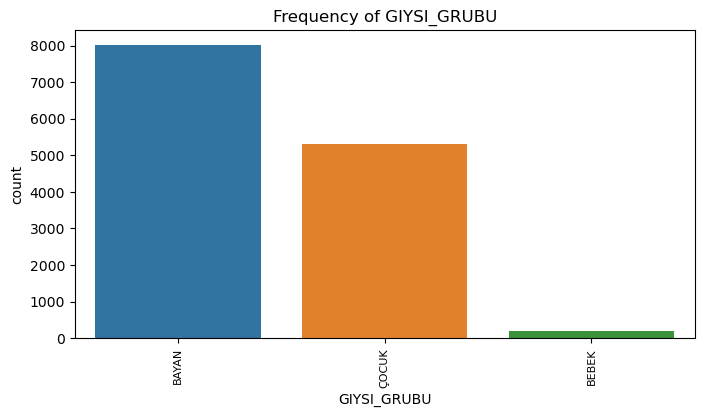

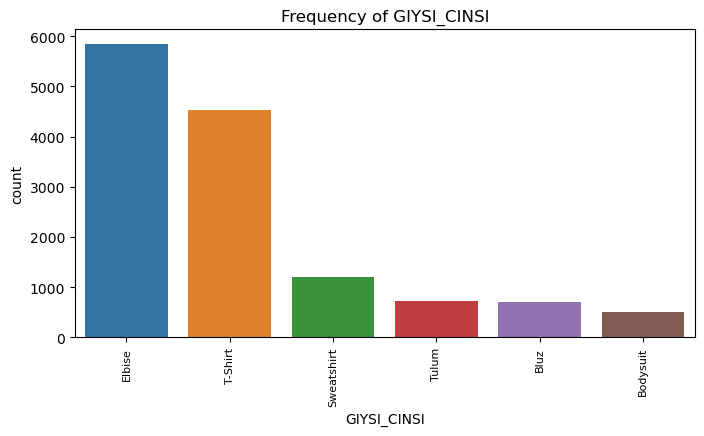

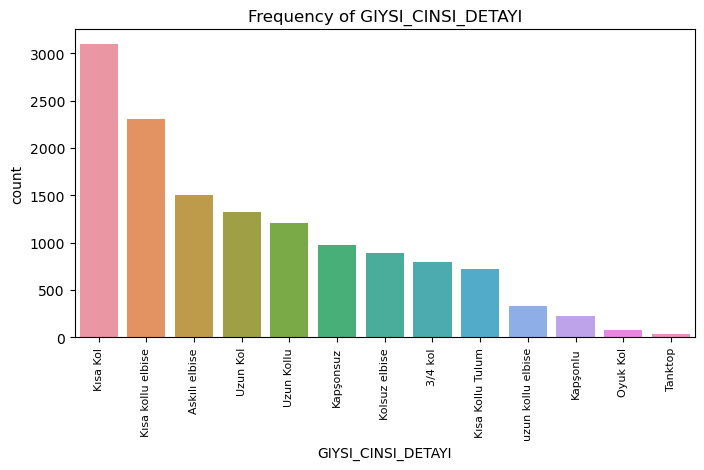

'UretimID' kolonunda '116709' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117559' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '126207' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162246' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109640' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119303' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104517' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105068' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108653' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '143276' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '122540' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118373' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117394' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135809' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '122056' kate

'UretimID' kolonunda '109184' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124699' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '129030' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '141568' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '138371' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118927' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115008' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '126196' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '154688' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '101843' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115015' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '149880' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128580' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135035' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112070' kate

'UretimID' kolonunda '114824' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '151218' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128596' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115621' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162832' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113090' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112459' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124906' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '146812' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111279' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135047' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113739' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '110273' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127338' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124696' kate

'UretimID' kolonunda '117694' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128558' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124358' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '153265' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105597' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117957' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '140562' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124638' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111645' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '103189' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128675' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128588' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108906' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119327' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '103730' kate

'UretimID' kolonunda '128017' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '160788' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119297' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '138079' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '161854' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '150752' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114870' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162284' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128271' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115291' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113171' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119283' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105394' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124706' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124660' kate

'UretimID' kolonunda '128723' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104917' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123843' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108856' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124587' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125596' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105708' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112123' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '150063' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128185' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '126001' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '160306' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '132301' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '161422' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '130935' kate

'UretimID' kolonunda '126961' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '159139' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127311' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '134708' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108309' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105640' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105648' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117046' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108841' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104669' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '103267' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '122563' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '159141' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105305' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '130538' kate

'UretimID' kolonunda '106571' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162041' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117344' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125139' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124401' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117998' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127841' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124686' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '139511' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '159420' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117880' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136805' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '103334' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124387' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116926' kate

'UretimID' kolonunda '124601' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '159654' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127920' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104889' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109005' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '122975' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '144851' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109963' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104120' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '138193' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118916' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106760' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108830' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106104' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135532' kate

'UretimID' kolonunda '103784' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '151272' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111589' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '145815' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105433' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112504' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '122523' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115920' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127171' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113153' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128877' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127820' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109421' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109052' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '130591' kate

'UretimID' kolonunda '158045' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105326' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118596' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '159747' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '141360' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117021' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104430' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136295' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127397' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104824' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '151514' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112732' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '151701' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '154745' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '107527' kate

'UretimID' kolonunda '140723' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105471' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125956' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '151035' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109203' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115045' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136125' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115441' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '154519' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104467' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118324' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '148648' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117325' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105155' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109014' kate

'UretimID' kolonunda '116335' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106157' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128115' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '102348' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105439' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125567' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '102052' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111033' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106789' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119644' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118846' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '143179' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '103524' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114945' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '154467' kate

'UretimID' kolonunda '126684' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '158827' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135626' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114174' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117172' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125040' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108374' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108155' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109561' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105442' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127408' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108466' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108967' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114475' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '131015' kate

'UretimID' kolonunda '102685' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119467' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136291' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '160834' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114957' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112633' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114228' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118447' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '151288' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '103213' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112609' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117777' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '143513' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106207' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '154848' kate

'UretimID' kolonunda '124317' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119199' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '130618' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108334' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '148723' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '130268' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109915' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '150944' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '151757' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106188' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '107931' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127982' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108798' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135541' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '110417' kate

'UretimID' kolonunda '108598' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128853' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128837' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117334' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115971' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '143198' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '141623' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '130585' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '154634' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116264' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '157906' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '110382' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114521' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112632' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109220' kate

'UretimID' kolonunda '108823' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '130497' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106845' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114728' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '145528' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136495' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '158191' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '157406' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '110119' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162539' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '107756' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135899' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116796' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136199' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '163095' kate

'UretimID' kolonunda '110689' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '154973' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104112' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '121385' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119174' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104178' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162422' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127995' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135823' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '157898' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '154933' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112297' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '130507' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105992' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '159114' kate

'UretimID' kolonunda '114374' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162795' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135576' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108669' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116822' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104193' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '102391' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '152765' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '103551' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '140038' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117951' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '150109' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111980' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136502' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112460' kate

'UretimID' kolonunda '158439' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115829' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128812' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113117' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118287' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106434' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123933' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113114' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115392' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125661' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116722' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '129057' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119055' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116949' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '161171' kate

'UretimID' kolonunda '150159' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117267' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117186' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106489' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127267' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117319' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112520' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117454' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118905' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '107706' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136420' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118584' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108183' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '161735' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '151471' kate

'UretimID' kolonunda '126400' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '110471' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111271' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117034' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119542' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112416' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115612' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '145060' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162363' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111992' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124764' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '154879' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113773' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111178' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127671' kate

'UretimID' kolonunda '104279' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113456' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '141596' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '139392' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '150254' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123401' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162569' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115559' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '160173' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124694' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162431' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119565' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135073' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118803' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '102239' kate

'UretimID' kolonunda '130202' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119024' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114430' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116801' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119636' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '161968' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117427' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127446' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114687' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '140443' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '160219' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115205' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127021' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115906' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '141041' kate

'UretimID' kolonunda '116740' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111624' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '103428' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112865' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117629' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '139571' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123833' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119291' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '152648' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118613' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123937' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117116' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '148575' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124958' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123956' kate

'UretimID' kolonunda '159302' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112491' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119235' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '137655' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115868' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123337' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '145664' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117955' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118461' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111418' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '150980' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127344' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115294' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '148724' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117384' kate

'UretimID' kolonunda '155051' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119533' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '149895' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '145953' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125028' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '140505' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '146810' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119005' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114624' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '148627' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136816' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123355' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '145020' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '103183' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123038' kate

'UretimID' kolonunda '140584' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112406' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '110746' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114835' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119627' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117298' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115899' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114796' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112452' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '146772' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111564' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127055' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '139503' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117091' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '142295' kate

'UretimID' kolonunda '137601' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105545' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117307' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116278' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124419' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114380' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124500' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124605' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112028' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115462' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117287' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '150399' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118040' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '145633' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111593' kate

'UretimID' kolonunda '154664' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123949' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '159598' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '150829' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '121554' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109775' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112729' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115921' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112796' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113556' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '159112' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '110060' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105755' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116943' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118088' kate

'UretimID' kolonunda '127409' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128106' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125270' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104301' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125237' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108808' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136770' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104663' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113434' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124412' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105781' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104312' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '137156' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104551' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '150971' kate

'UretimID' kolonunda '151122' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135247' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106752' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117680' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '107452' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105414' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106046' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123518' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '126638' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104046' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113948' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '139718' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116860' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '137864' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104787' kate

'UretimID' kolonunda '157663' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '158192' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117264' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117991' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109883' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127510' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127980' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '152668' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '130607' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '161022' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '109337' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '142356' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136971' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127302' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125077' kate

'UretimID' kolonunda '135056' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118051' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '157671' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '123830' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '127119' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118032' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128242' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '139561' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '121946' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105465' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '154670' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '103817' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136675' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '107518' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '151311' kate

'UretimID' kolonunda '148357' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112249' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '159108' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115557' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128545' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115870' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111355' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '128516' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '158498' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106885' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '126066' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105864' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '130205' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '158233' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '114278' kate

'UretimID' kolonunda '140387' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '103200' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116923' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '135788' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116182' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '122022' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '160835' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116263' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113462' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113382' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104584' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125591' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '118316' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116012' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '117322' kate

'UretimID' kolonunda '162638' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '102489' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '146586' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '138015' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116814' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115935' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119516' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162941' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '162513' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111958' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '140651' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136557' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '141176' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105409' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112272' kate

'UretimID' kolonunda '162797' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119822' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '150754' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '111628' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '141375' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116142' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '126540' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '136815' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115651' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '107942' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '104724' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115558' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112502' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108222' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105094' kate

'UretimID' kolonunda '145641' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '108914' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119030' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '161527' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '146136' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124474' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '152078' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '115594' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '155716' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '126098' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '112058' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116795' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116629' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '119598' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '151739' kate

'UretimID' kolonunda '117653' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '148685' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '132417' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '141123' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '160297' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '113817' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '116679' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125025' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '124964' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '106176' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '125292' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '137962' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '150532' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '151967' kategorisi sadece 1 kez tekrar ediyor.
'UretimID' kolonunda '105201' kate

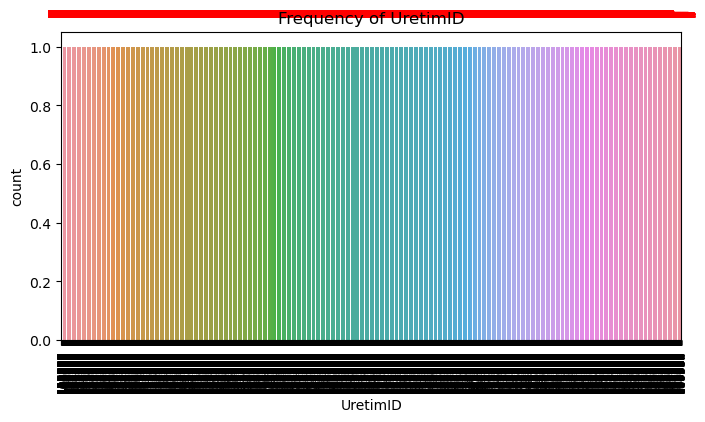

'ModelAdi' kolonunda '2228588 JISSOANA ELBISE' kategorisi sadece 8 kez tekrar ediyor.


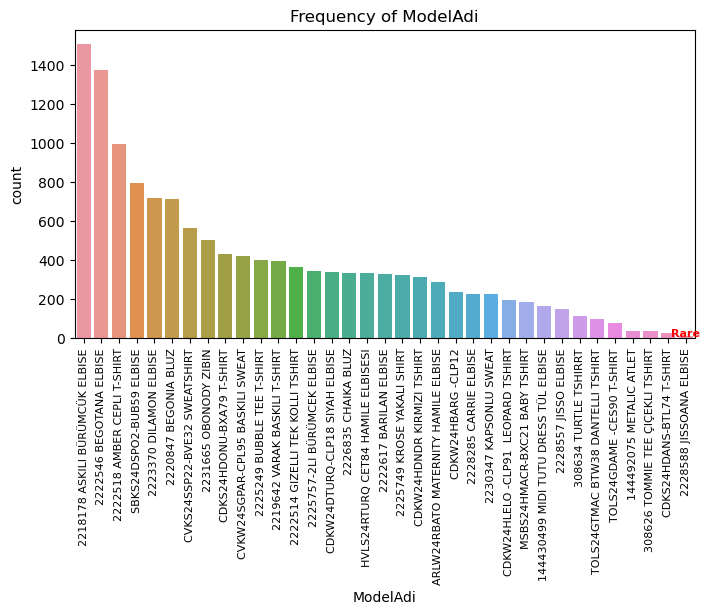

'PersonelNo' kolonunda '196' kategorisi sadece 18 kez tekrar ediyor.
'PersonelNo' kolonunda '425' kategorisi sadece 18 kez tekrar ediyor.
'PersonelNo' kolonunda '289' kategorisi sadece 17 kez tekrar ediyor.
'PersonelNo' kolonunda '620' kategorisi sadece 17 kez tekrar ediyor.
'PersonelNo' kolonunda '505' kategorisi sadece 16 kez tekrar ediyor.
'PersonelNo' kolonunda '530' kategorisi sadece 16 kez tekrar ediyor.
'PersonelNo' kolonunda '286' kategorisi sadece 15 kez tekrar ediyor.
'PersonelNo' kolonunda '522' kategorisi sadece 15 kez tekrar ediyor.
'PersonelNo' kolonunda '610' kategorisi sadece 15 kez tekrar ediyor.
'PersonelNo' kolonunda '293' kategorisi sadece 15 kez tekrar ediyor.
'PersonelNo' kolonunda '487' kategorisi sadece 15 kez tekrar ediyor.
'PersonelNo' kolonunda '455' kategorisi sadece 14 kez tekrar ediyor.
'PersonelNo' kolonunda '492' kategorisi sadece 13 kez tekrar ediyor.
'PersonelNo' kolonunda '308' kategorisi sadece 13 kez tekrar ediyor.
'PersonelNo' kolonunda '497' kateg

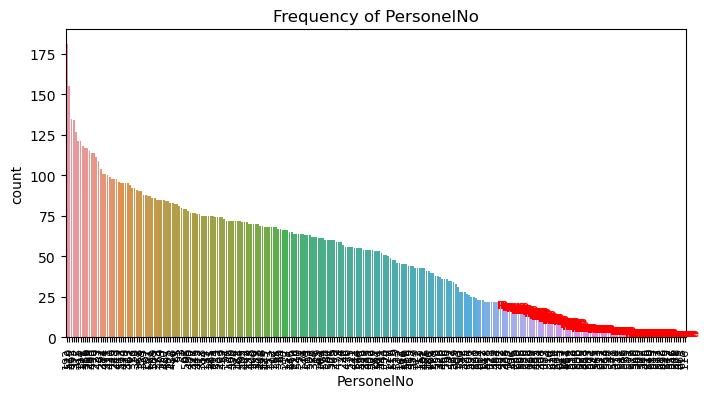

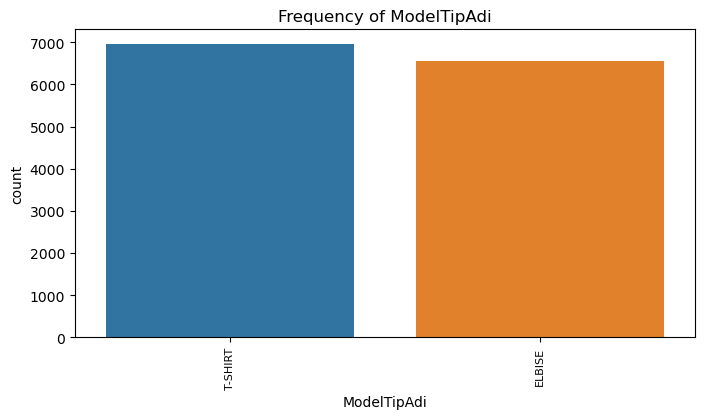

'OperAdi' kolonunda 'YAKA MENDIL OVERLOK' kategorisi sadece 19 kez tekrar ediyor.
'OperAdi' kolonunda 'KOL FIRFIR SILIKON' kategorisi sadece 19 kez tekrar ediyor.
'OperAdi' kolonunda 'PILE DIKME' kategorisi sadece 19 kez tekrar ediyor.
'OperAdi' kolonunda 'ÖN KOL EVI ÇIMA' kategorisi sadece 18 kez tekrar ediyor.
'OperAdi' kolonunda 'CEP ÇIMA' kategorisi sadece 18 kez tekrar ediyor.
'OperAdi' kolonunda 'KOL EVI BASMA' kategorisi sadece 18 kez tekrar ediyor.
'OperAdi' kolonunda 'ARKA KOL EVI ÇIMA' kategorisi sadece 18 kez tekrar ediyor.
'OperAdi' kolonunda 'KORDON UCU KIVIRMA' kategorisi sadece 18 kez tekrar ediyor.
'OperAdi' kolonunda 'ALT YAN ÇATMA' kategorisi sadece 18 kez tekrar ediyor.
'OperAdi' kolonunda 'TÜNEL BEL  EMNIYET' kategorisi sadece 18 kez tekrar ediyor.
'OperAdi' kolonunda 'ARKA V TUTTURMA' kategorisi sadece 17 kez tekrar ediyor.
'OperAdi' kolonunda 'ÖN PAT KAPAMA' kategorisi sadece 17 kez tekrar ediyor.
'OperAdi' kolonunda 'PAÇA SÜRFLE' kategorisi sadece 17 kez tekrar e

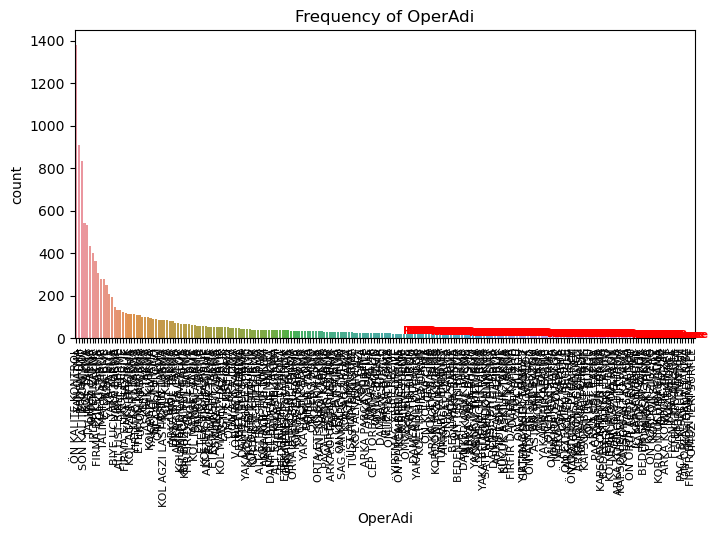

'MakinaTipi' kolonunda 'ILIK MAKINESI' kategorisi sadece 12 kez tekrar ediyor.
'MakinaTipi' kolonunda 'RACING OVERLOK' kategorisi sadece 4 kez tekrar ediyor.


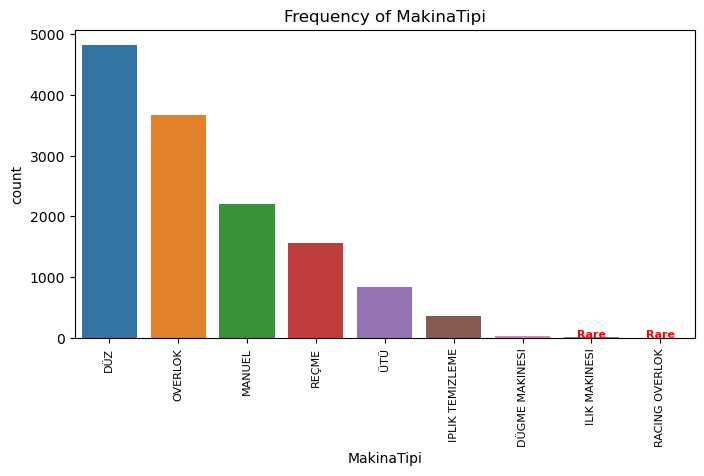

CSV dosyaları kaydedildi: 'sorted_by_column_category.csv' ve 'sorted_by_frequency.csv'


In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kategorik ve numerik değişkenleri ayır
categorical_columns = df_filtered.select_dtypes(include=['object']).columns
numerical_columns = df_filtered.select_dtypes(include=['number']).columns

# Eşik değeri (threshold) belirleyin
threshold = 20

# Nadir kategorileri saklamak için bir liste oluşturun
rare_categories_list = []

# Kategorik değişkenlerin frekans grafikleri ve nadir kategorilerin işaretlenmesi
for col in categorical_columns:
    plt.figure(figsize=(8, 4))  # Daha küçük bir grafik boyutu ayarlayın
    value_counts = df_filtered[col].value_counts()
    sns.countplot(x=col, data=df_filtered, order=value_counts.index)
    
    # Nadir kategorileri işaretle ve listeye ekle
    rare_categories = value_counts[value_counts < threshold]
    for rare_cat in rare_categories.index:
        print(f"'{col}' kolonunda '{rare_cat}' kategorisi sadece {rare_categories[rare_cat]} kez tekrar ediyor.")
        plt.text(x=list(value_counts.index).index(rare_cat), y=rare_categories[rare_cat] + 0.1, s='Rare', 
                 color='red', ha='center', fontsize=8, fontweight='bold')
        
        # Nadir kategoriyi ve kaç kez tekrar ettiğini bir DataFrame olarak kaydet
        rare_categories_list.append({
            'Column': col,
            'Category': rare_cat,
            'Frequency': rare_categories[rare_cat]
        })
    
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=90, fontsize=8)  # Kolon isimlerini dik (90 derece) ve küçük fontta yazdır
    plt.show()

# Nadir kategorileri içeren DataFrame oluşturun
rare_categories_df = pd.DataFrame(rare_categories_list)

# 1. CSV: Kolon, Kategori (Sayısal ise küçükten büyüğe, alfabetik sıralı), Frequency'e göre sıralı
# Kategoriyi önce sayısal ise küçükten büyüğe, sonra alfabetik olarak sıralayın
rare_categories_df['Category_Sorted'] = rare_categories_df['Category'].apply(lambda x: (float(x) if x.replace('.', '', 1).isdigit() else x))

sorted_by_column_category = rare_categories_df.sort_values(by=['Column', 'Category_Sorted', 'Frequency'])
sorted_by_column_category.to_csv('sorted_by_column_category.csv', index=False)

# 2. CSV: Önce Frequency'e, sonra Kolon ve Kategori'ye göre sıralı
sorted_by_frequency = rare_categories_df.sort_values(by=['Frequency', 'Column', 'Category_Sorted'])
sorted_by_frequency.to_csv('sorted_by_frequency.csv', index=False)

print("CSV dosyaları kaydedildi: 'sorted_by_column_category.csv' ve 'sorted_by_frequency.csv'")


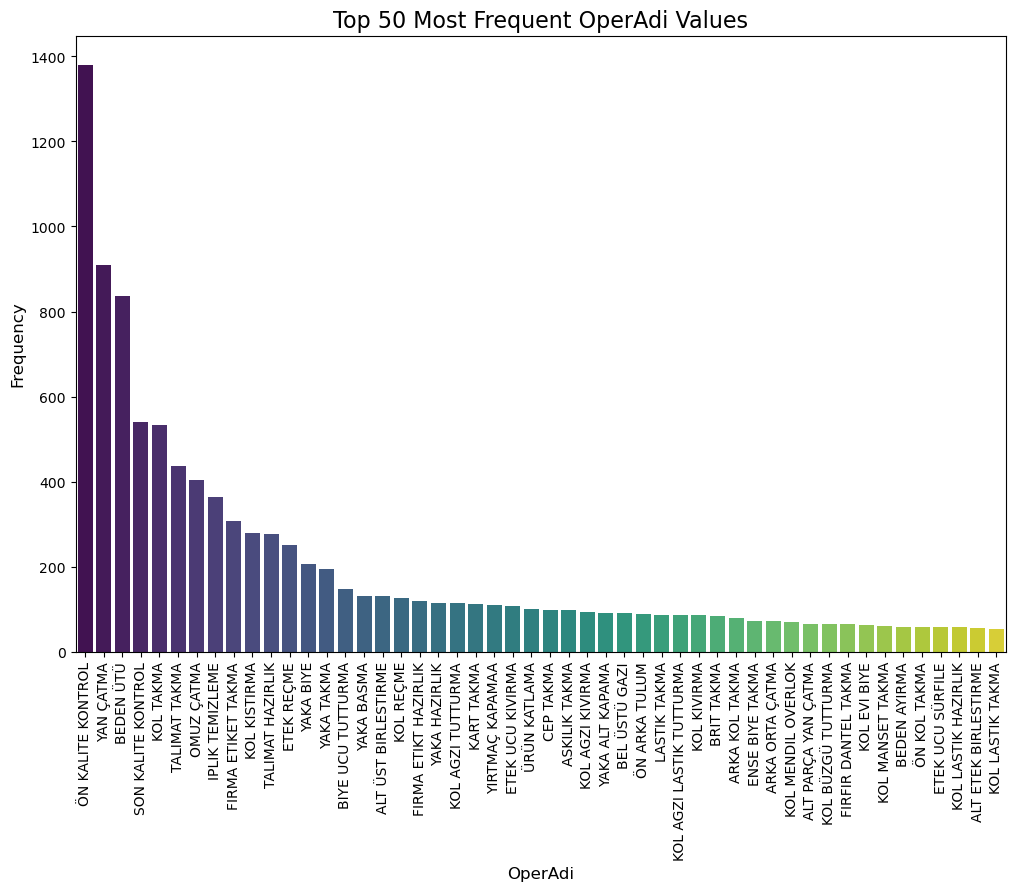

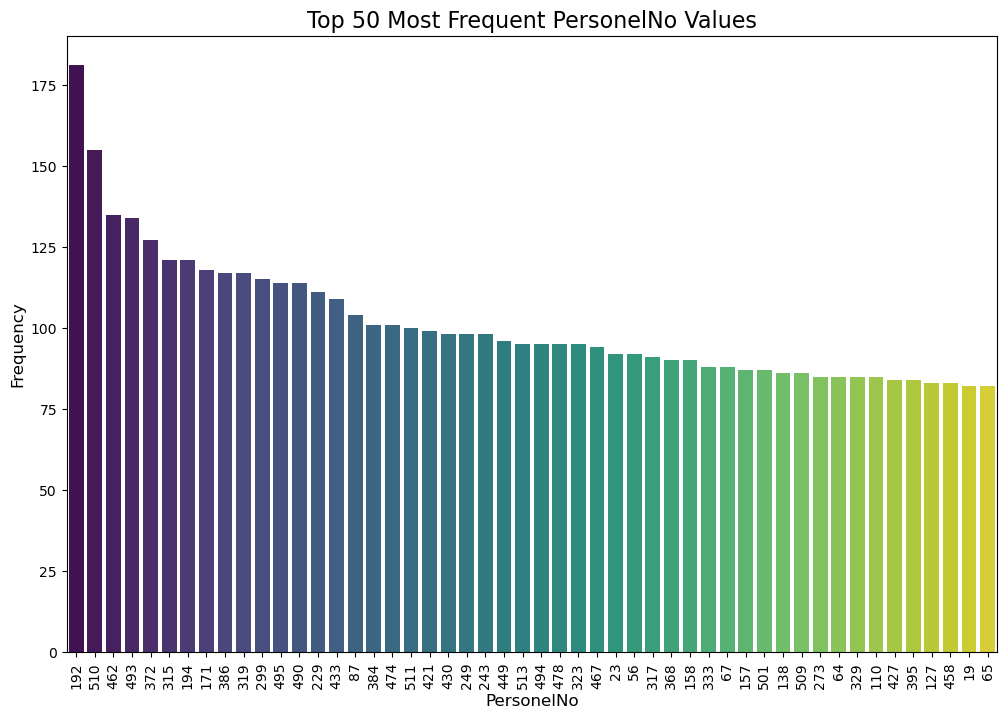

In [190]:
# OperAdi ve PersonelNo kolonlarının en çok tekrar eden 50 frekans değerini bulmak
top_50_operadi = df_filtered['OperAdi'].value_counts().nlargest(50)
top_50_personelno = df_filtered['PersonelNo'].value_counts().nlargest(50)

# OperAdi kolonundaki en çok tekrar eden 50 değerin grafiğini çizme
plt.figure(figsize=(12, 8))
sns.barplot(x=top_50_operadi.index, y=top_50_operadi.values, palette="viridis")
plt.title('Top 50 Most Frequent OperAdi Values', fontsize=16)
plt.xlabel('OperAdi', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)  # OperAdi değerlerini 90 derece döndürerek daha iyi okunabilirlik sağlar
plt.show()

# PersonelNo kolonundaki en çok tekrar eden 50 değerin grafiğini çizme
plt.figure(figsize=(12, 8))
sns.barplot(x=top_50_personelno.index, y=top_50_personelno.values, palette="viridis")
plt.title('Top 50 Most Frequent PersonelNo Values', fontsize=16)
plt.xlabel('PersonelNo', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)  # PersonelNo değerlerini 90 derece döndürerek daha iyi okunabilirlik sağlar
plt.show()

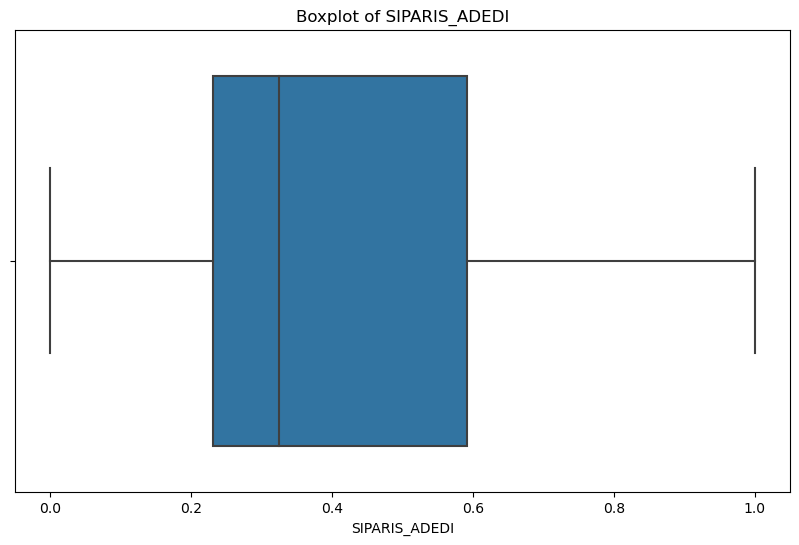

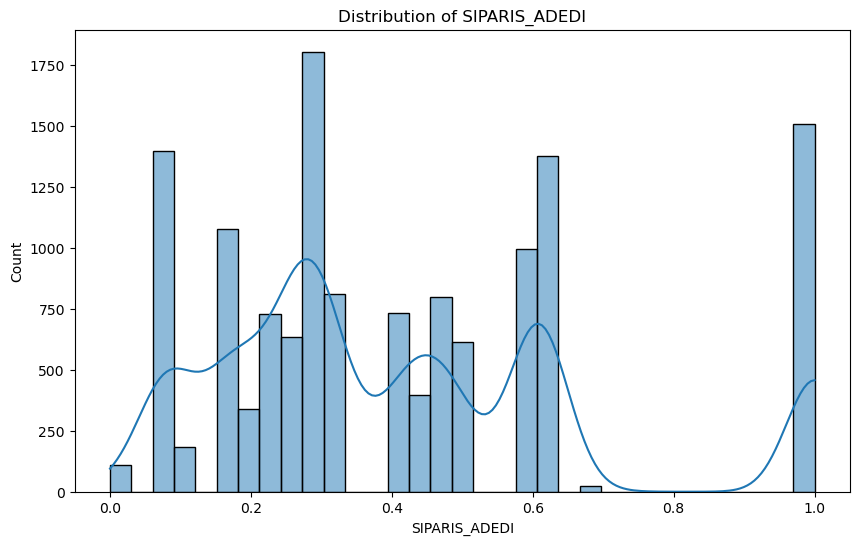

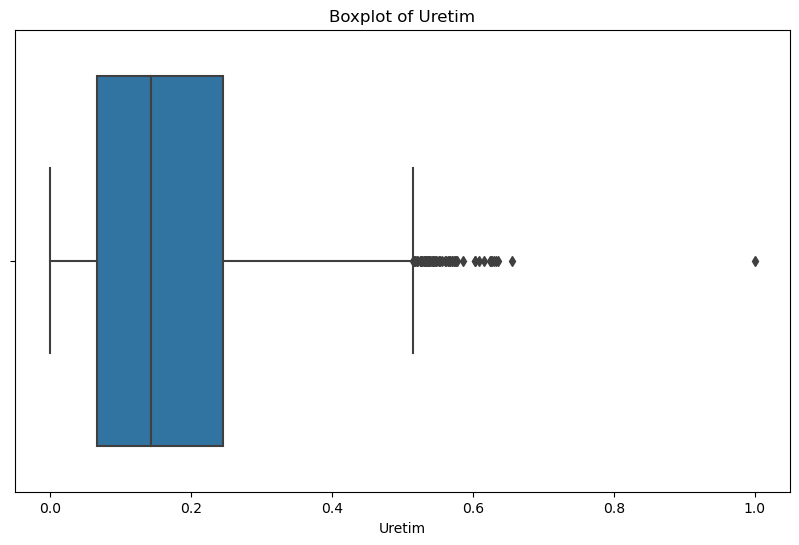

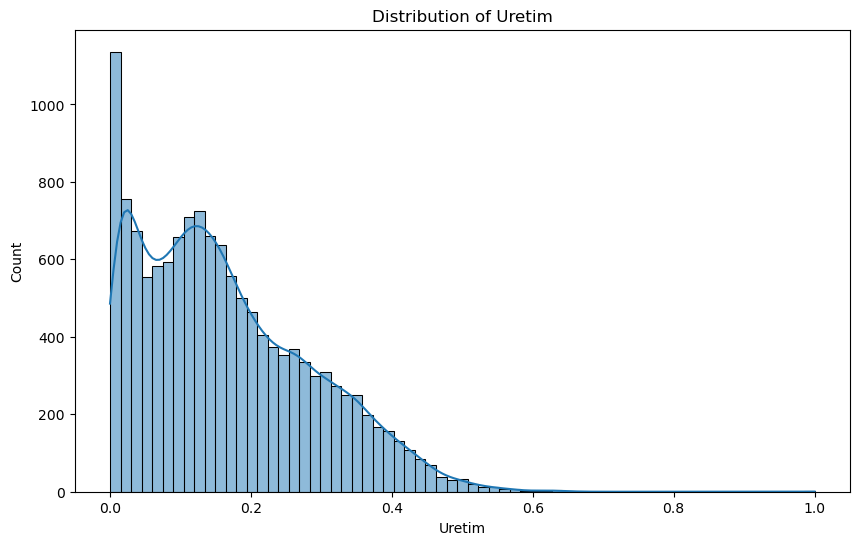

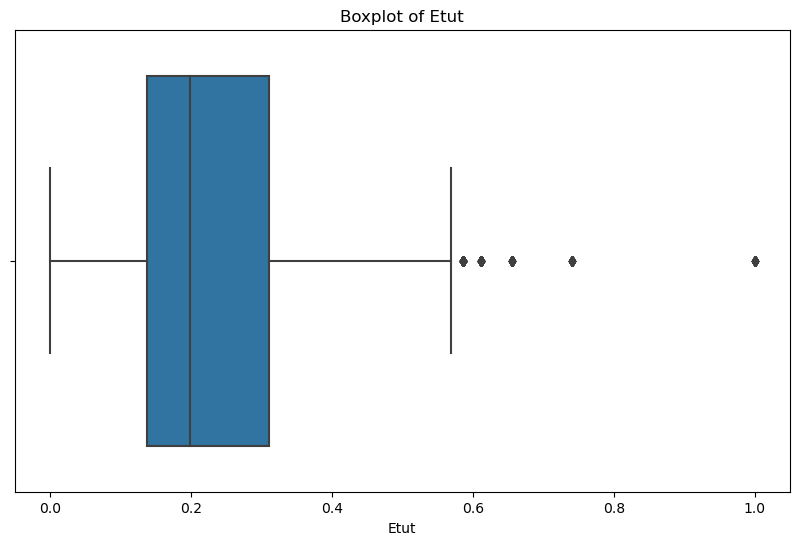

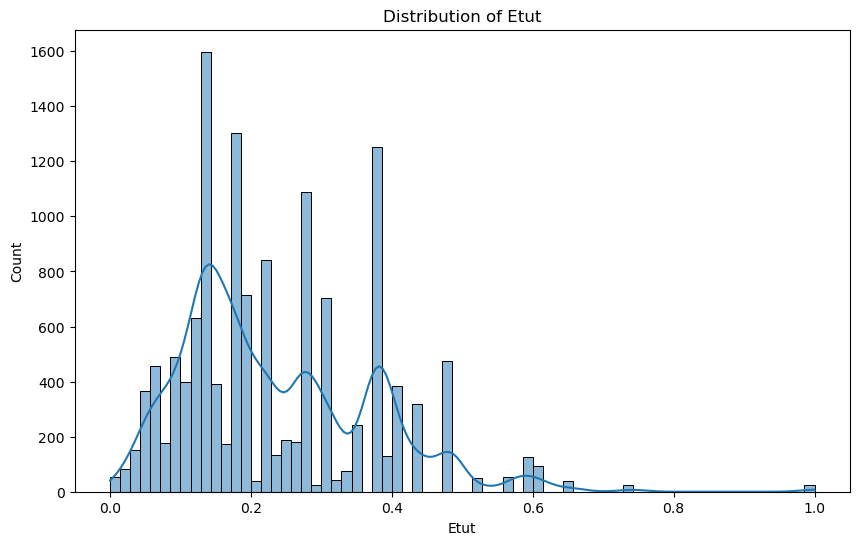

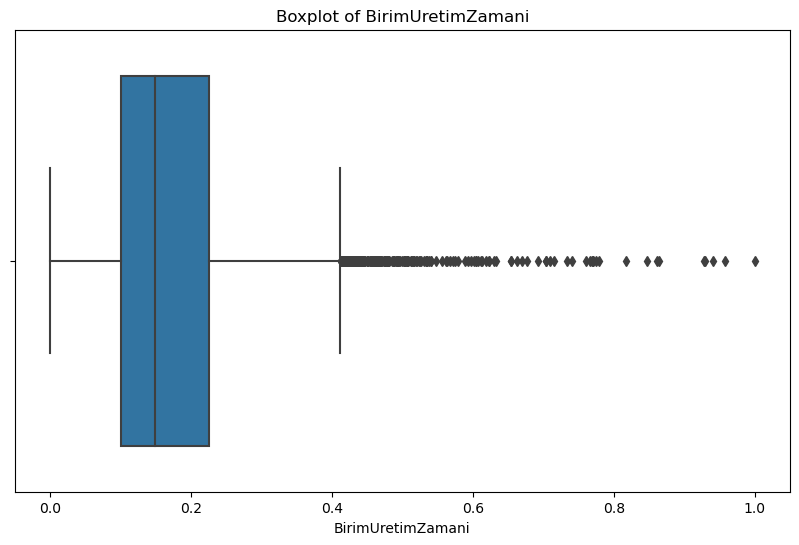

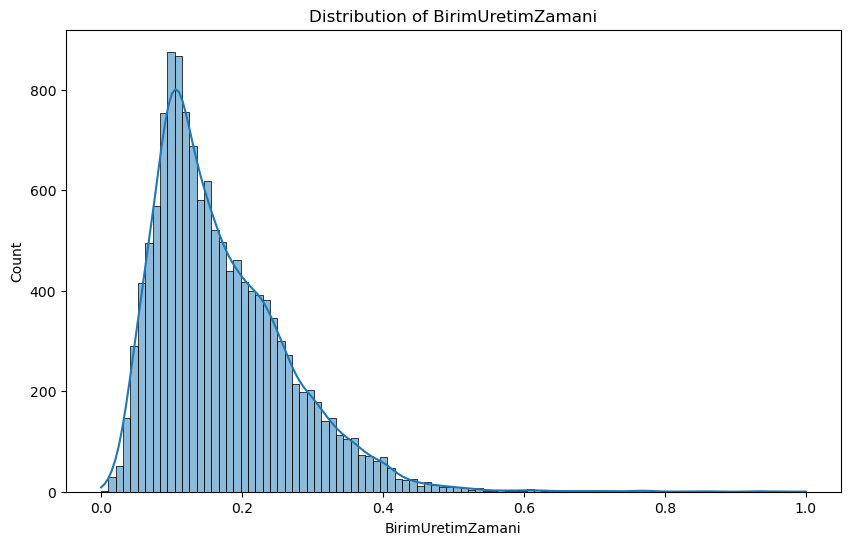

In [191]:
# Numerik değişkenlerin boxplot ve dağılım grafiklerini çiz
for col in numerical_columns:
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_filtered[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    
    # Dağılım grafiği
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtered[col], kde=True, bins='auto')
    plt.title(f'Distribution of {col}')
    plt.show()


In [116]:
"""
-----#Bu kod neden var?#--------

# Veri kümesini oku
df = pd.read_csv('Uretim_Van_TShirt-Elbise_240820.v4.csv', sep=';')
# Belirli kolonları seçmek için
selected_columns = ['UretimID','OrderNo','PersonelNo','ModelTipAdi',
                    'OperAdi','MakinaTipi','Uretim','Etut','BirimUretimZamani'] 
#Personal Adi çıkarıldı 
#306 unique değer var, değerlerin uyuştuğu kontrol edildi.
# Uretim ID unique olduğu için çıkarıldı.
# Filtrelenecek kolon isimleri
#"['PersonelYetkinlik', KumasKarisimi, 'ModelTipiDetayi', 'KumasTipi'] not in index"
# Sadece seçilen kolonları içeren yeni DataFrame oluştur
df = df[selected_columns]
# PersonelNo ve UretimID kolonlarını string'e çevir
df['UretimID'] = df['UretimID'].astype(str)

df['PersonelNo'] = df['PersonelNo'].astype(str)
df['Etut'] = df['Etut'].str.replace(',', '.').astype(float)
df = df[(df['Uretim'] > 0) & (df['BirimUretimZamani'] > 0)]
#df = df[df['BirimUretimZamani'] <= 200]

df = df.dropna()

df = df.sort_values(by='BirimUretimZamani',ascending=False)
"""

In [140]:
# MAPE hesaplayan fonksiyon
def calculate_mape(actual, forecasted):
    return (abs((actual - forecasted) / actual)).mean() * 100


In [141]:
df_filtered

,SIPARIS_ADEDI,GIYSI_GRUBU,GIYSI_CINSI,GIYSI_CINSI_DETAYI,UretimID,ModelAdi,PersonelNo,ModelTipAdi,OperAdi,MakinaTipi,Uretim,Etut,BirimUretimZamani
10192,0.062318,ÇOCUK,Elbise,Kısa kollu elbise,116709,144430499 MIDI TUTU DRESS TÜL ELBISE,495,ELBISE,TÜL ASTAR BIRLSTME,OVERLOK,0.004434,1.000000,1.000000
10196,0.062318,ÇOCUK,Elbise,Kısa kollu elbise,116754,144430499 MIDI TUTU DRESS TÜL ELBISE,210,ELBISE,TÜL ASTAR BIRLSTME,OVERLOK,0.030516,1.000000,0.957834
10176,0.062318,ÇOCUK,Elbise,Kısa kollu elbise,116610,144430499 MIDI TUTU DRESS TÜL ELBISE,444,ELBISE,TÜL ASTAR BIRLSTME,OVERLOK,0.042254,1.000000,0.941011
10231,0.062318,ÇOCUK,Elbise,Kısa kollu elbise,117007,144430499 MIDI TUTU DRESS TÜL ELBISE,524,ELBISE,TÜL ASTAR BIRLSTME,OVERLOK,0.037298,1.000000,0.929855
10181,0.062318,ÇOCUK,Elbise,Kısa kollu elbise,116649,144430499 MIDI TUTU DRESS TÜL ELBISE,515,ELBISE,TÜL ASTAR BIRLSTME,OVERLOK,0.045905,1.000000,0.927966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,0.076394,BAYAN,Elbise,Kolsuz elbise,122097,2222617 BARILAN ELBISE,390,ELBISE,FIRMA ETIKT HAZIRLIK,DÜZ,0.045123,0.008621,0.017525
9320,0.231040,BAYAN,Tulum,Kısa Kollu Tulum,125509,2223370 DILAMON ELBISE,390,ELBISE,FIRMA ETIKT HAZIRLIK,DÜZ,0.056599,0.008621,0.017394
9429,0.231040,BAYAN,Tulum,Kısa Kollu Tulum,126008,2223370 DILAMON ELBISE,390,ELBISE,FIRMA ETIKT HAZIRLIK,DÜZ,0.357329,0.008621,0.016691
9390,0.231040,BAYAN,Tulum,Kısa Kollu Tulum,125818,2223370 DILAMON ELBISE,390,ELBISE,FIRMA ETIKT HAZIRLIK,DÜZ,0.130673,0.008621,0.016427


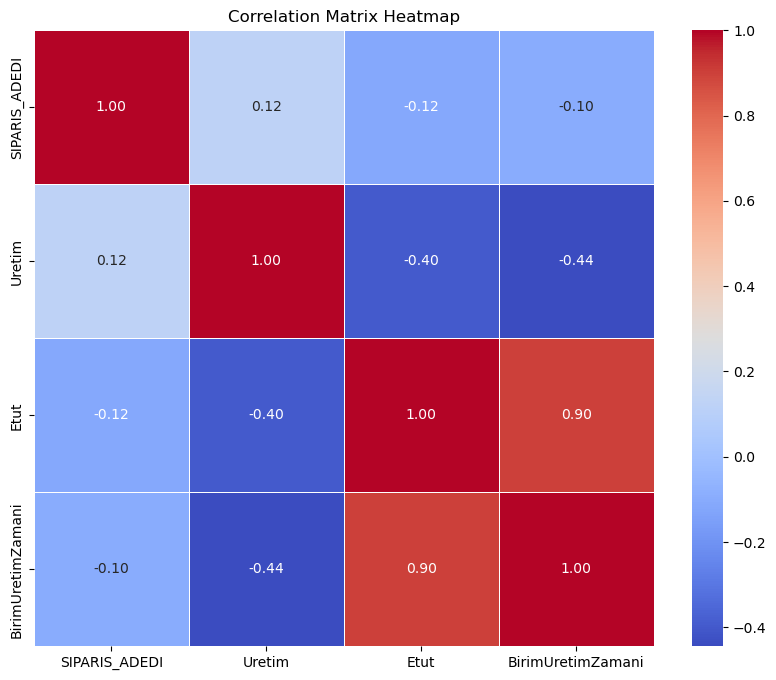

In [143]:
# Sadece sayısal sütunları seçelim
df_filtered = merged_df[merged_df['BirimUretimZamani'] <= 2 * merged_df['Etut']]

numerical_data = df_filtered.select_dtypes(include=[np.number])

# Korelasyon matrisini hesaplayalım
correlation_matrix = numerical_data.corr()

# Isı haritasını çizelim
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [145]:
# MAPE'yi hesapla
mape = calculate_mape(df_filtered['BirimUretimZamani'], merged_df['Etut'])
print(mape)

21.132368228996633


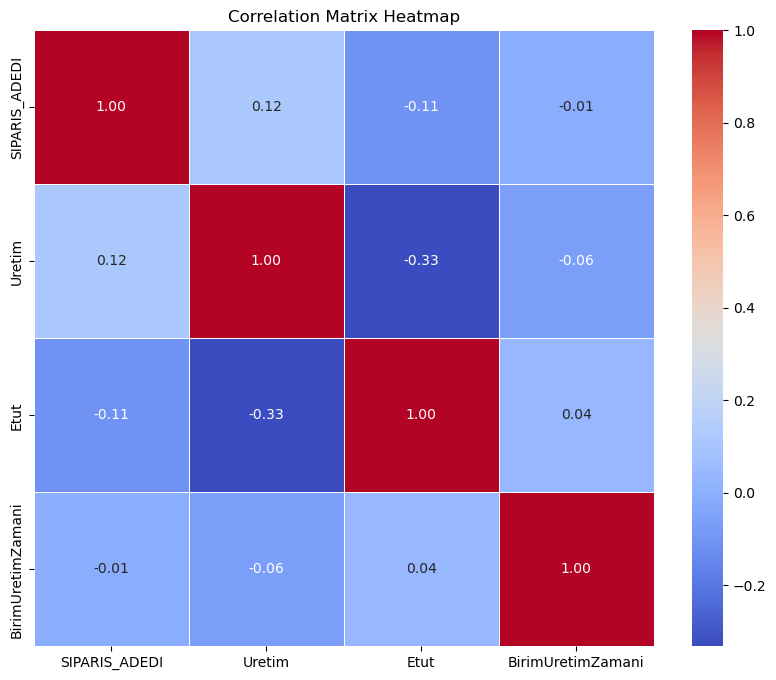

In [146]:
numerical_data = merged_df.select_dtypes(include=[np.number])

# Korelasyon matrisini hesaplayalım
correlation_matrix = numerical_data.corr()

# Isı haritasını çizelim
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [147]:
# MAPE'yi hesapla
mape = calculate_mape(merged_df['BirimUretimZamani'], merged_df['Etut'])
print(mape)

26.477741320518593


In [148]:
import pandas as pd

# BirimUretimZamani değişkenindeki IQR'ı hesapla
Q1 = df_filtered['BirimUretimZamani'].quantile(0.25)
Q3 = df_filtered['BirimUretimZamani'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırları hesapla
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outlier'ları çıkar (Bu sınırların dışında kalan değerleri çıkartıyoruz)
df_filtered_no_outliers = df_filtered[(df_filtered['BirimUretimZamani'] >= lower_bound) & (df_filtered['BirimUretimZamani'] <= upper_bound)]

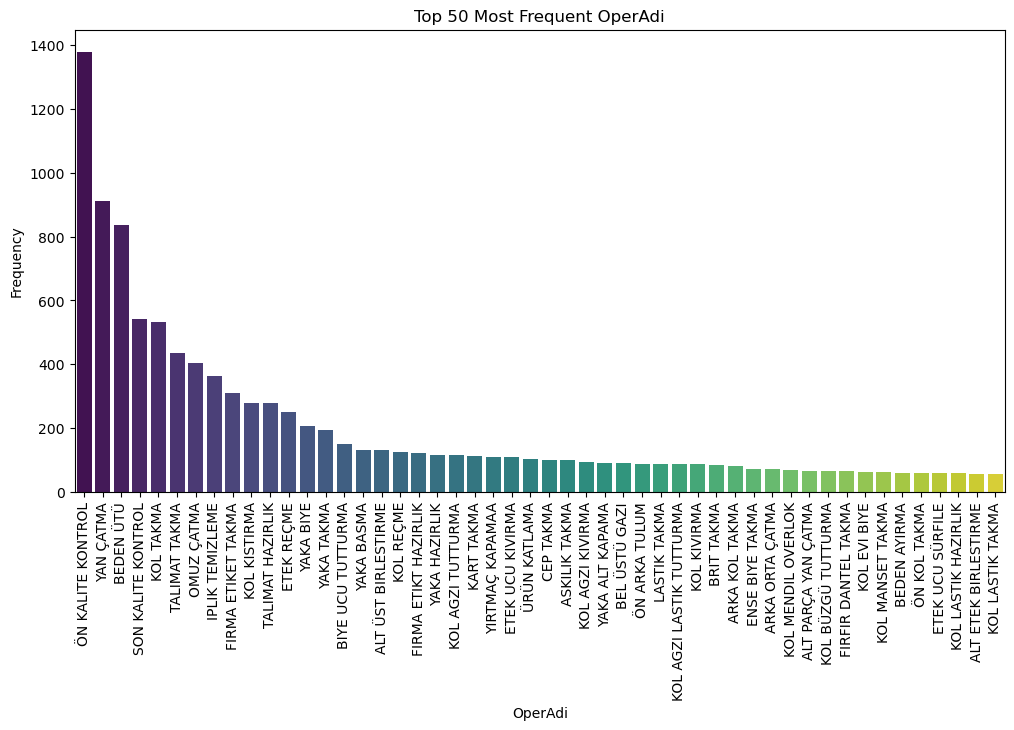

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# En sık görülen ilk 20 'OperAdi' değerini seç
top_20_operadi = df_filtered['OperAdi'].value_counts().nlargest(50)

# Frekans grafiğini oluştur
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_operadi.index, y=top_20_operadi.values, palette='viridis')
plt.title('Top 50 Most Frequent OperAdi')
plt.xticks(rotation=90, fontsize=10)  # X eksenindeki etiketleri döndür ve boyutunu küçült
plt.ylabel('Frequency')
plt.xlabel('OperAdi')
plt.show()

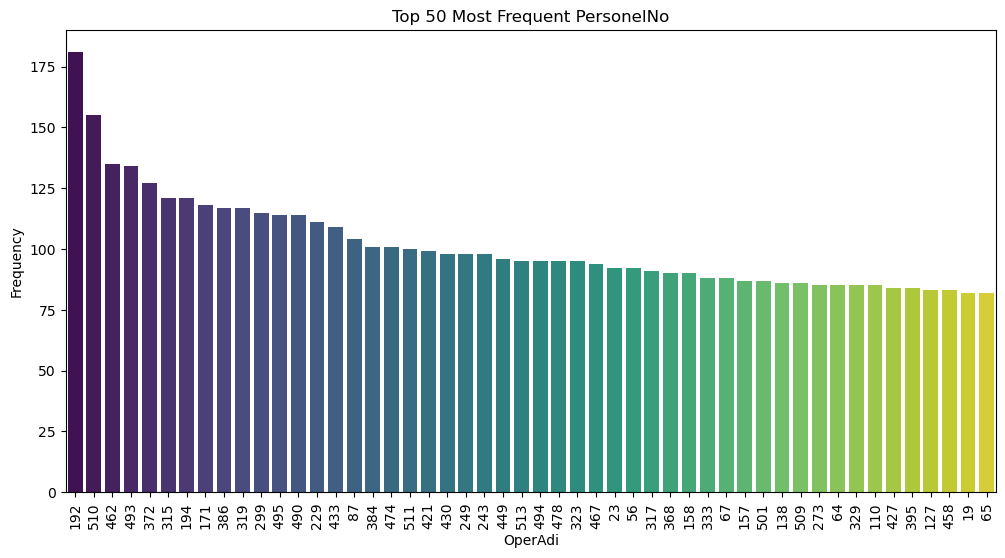

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# En sık görülen ilk 20 'OperAdi' değerini seç
top_20_operadi = df_filtered['PersonelNo'].value_counts().nlargest(50)

# Frekans grafiğini oluştur
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_operadi.index, y=top_20_operadi.values, palette='viridis')
plt.title('Top 50 Most Frequent PersonelNo')
plt.xticks(rotation=90, fontsize=10)  # X eksenindeki etiketleri döndür ve boyutunu küçült
plt.ylabel('Frequency')
plt.xlabel('OperAdi')
plt.show()

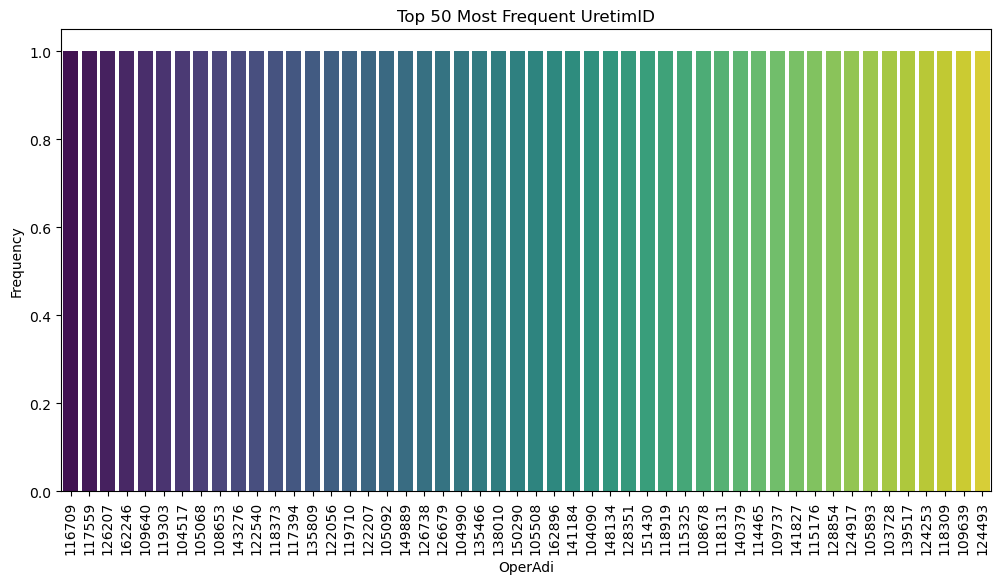

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# En sık görülen ilk 20 'OperAdi' değerini seç
top_20_operadi = df_filtered['UretimID'].value_counts().nlargest(50)

# Frekans grafiğini oluştur
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_operadi.index, y=top_20_operadi.values, palette='viridis')
plt.title('Top 50 Most Frequent UretimID')
plt.xticks(rotation=90, fontsize=10)  # X eksenindeki etiketleri döndür ve boyutunu küçült
plt.ylabel('Frequency')
plt.xlabel('OperAdi')
plt.show()